# Fig 5 MRE GSEA and Differential Expression

## Initialization

In [1]:
# Load libraries
library(ggplot2)
library(ggrepel)
library(ggpubr)
library(ggsci)
library(dplyr)
library(tidyr)
library(viridis)
library(plotthis)



Attaching package: ‘dplyr’


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union


Loading required package: viridisLite



In [2]:
# Initialize location
setwd("/home/dalbao/2023-012-Runx3mutD8scRNA/AlbaoRunx3Manuscript/figures/05")

# Load scripts
source("../../scripts/volcano.R")
source("../../scripts/plotSEA.R")

Warning message:
“package ‘ggpp’ was built under R version 4.4.3”
Registered S3 methods overwritten by 'ggpp':
  method                  from   
  heightDetails.titleGrob ggplot2
  widthDetails.titleGrob  ggplot2


Attaching package: ‘ggpp’


The following objects are masked from ‘package:ggpubr’:

    as_npc, as_npcx, as_npcy


The following object is masked from ‘package:ggplot2’:

    annotate




## Plot RPE GSEA

In [3]:
# Load GSEA CSV
gsea <- read.csv("../../csv/05_25-12-08-17-07_cVr-GSEA_MRE.csv.gz")

# Check
head(gsea)

,cluster,ID,Description,setSize,enrichmentScore,NES,pvalue,p.adjust,qvalue,rank,leading_edge,core_enrichment,BH
,<chr>,<chr>,<chr>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<chr>,<chr>,<dbl>
1,Cluster0,TXM-8E,TXM-8E,675,0.8617201,2.561173,0.0002647604,0.0009361835,0.0004434553,1733,"tags=63%, list=9%, signal=60%",Zeb2/Gzma/Cx3cr1/Il18rap/Rap1b/Klrg1/S1pr5/Arhgef3/Ccl5/Itgb2/Itgal/Jak1/As3mt/Itgb1/Klre1/Lgals1/Ikzf3/Spn/Rap1gap2/Borcs7/Klf3/Ptprc/Ctsd/Gsap/Fyn/Prkch/Itm2b/S100a13/1700025G04Rik/Tm6sf1/Sp100/Ifitm10/Tmem163/Apobec2/Snx5/Rasgrp2/Slc9a7/Osbpl8/Cdkn2d/Fam117a/Arl15/Spata13/Ppp4r2/Cyth4/Kpna4/Cd84/Zdhhc20/Esm1/Fam49a/Tspan5/Dapk2/N4bp1/Acss2/Sppl3/Lpin1/Ccl3/Nkg7/Gzmk/Txndc17/Ptpn12/Tyk2/Usp3/Snx10/Ccdc88c/Emp3/Psma6/Atp2a3/Ppp2r5c/Stat4/Lck/Gab3/Cd52/Racgap1/Tbkbp1/Sept11/Hid1/Ccl4/Il17ra/Arntl/Capn2/Ubash3b/Lats2/Rsu1/Tmem131l/Chd7/Cd8a/Krtcap2/Map1lc3b/Fhl2/Atg4d/Tmem71/Arf4/Smpdl3b/P3h4/Pitpnc1/Atp2b1/Gabarapl2/Ndufs4/Rnf166/Myl12b/Srp19/D1Ertd622e/Tax1bp1/Sh3glb1/Adam17/Prf1/D16Ertd472e/Rab8b/Ube2g2/Nod1/Tprgl/Phf20l1/Rhoq/Tnfaip8l2/Rab27a/Notch3/Gpx8/Gss/Rps6ka5/Ctsa/Sdcbp/Vopp1/Prr13/Gtf2i/Picalm/Npm3/Hace1/Cdc20b/Srcin1/Lrrfip2/Arl6ip5/Abi1/Pepd/Kcnj8/Ccnl1/Twf2/Sars/Azi2/Rpa2/6330403K07Rik/Bcap31/Aprt/Slamf7/Sike1/Rnf19a/Klrd1/Dennd5a/Gabarap/Bzw1/Dglucy/Psenen/Exoc2/Baiap3/Atg7/2610528A11Rik/Polr2k/Pnrc2/Bnip3l/Vgll4/Ptp4a2/Trp53inp1/Eya3/Atp6v1f/Zdhhc15/Ak3/F2r/Chmp5/Entpd1/Insl6/Slc25a51/Hspa4l/Ide/Sytl2/Cmpk1/Rab2a/Vamp4/Gpd2/Ptpn4/Pxylp1/Acsl4/Ccdc50/Spag1/Capns1/Snx18/Pogk/Tmf1/Ten1/Ube2b/Reps1/Trappc1/Rc3h1/Calm2/Fbxl2/Dcp1b/Bin1/Crebrf/Il12rb2/Serpinb1a/Txndc5/Nhsl2/Esd/Slc9a9/Arhgap25/Chpt1/Prdm1/Erbin/Klra3/Cript/Arf1/Cd160/Ptbp3/Pycard/Rap2a/Lamb3/Sacm1l/Nt5c3b/Fam214a/Kdm4c/Tsga10/Plek/Slc23a2/Slc50a1/Sfxn3/Rps6ka3/Xrn2/Mfsd14b/Sh3bgrl/Tes/Frmd5/St3gal1/Clcn4/Copb1/Sirt2/Mpnd/Rtraf/Lamtor4/Sord/Ndfip2/Mob1a/Casp7/Pold4/Sec14l1/Med12l/Gab2/Brk1/Sh3bgrl3/Nckap1l/Golm1/Ccser2/Csde1/H2-M3/Sypl/Ythdf3/Smim15/Eif3h/Sytl3/Havcr2/Cmas/Ubxn6/Ubb/Cir1/Atox1/Hdhd5/Ssu72/Tmx3/Vrk3/Sin3b/Atp6v0e/Cnnm2/Nptn/Dnajc8/Ly9/Dstn/Papss1/Dazap2/Fcgr2b/Rnf115/Tmem50a/Tomm22/Thy1/Pgm2/Ifit2/Samsn1/Tars/Tiparp/Nub1/Rap1a/Vrk2/Pttg1ip/Nfatc3/Eloa/Brd9/Ap3b1/Fkbp10/Gns/Smad2/Smpd2/Kxd1/Slu7/Srp68/Acap2/Lzic/Ccl9/Glul/Trappc8/Inpp4a/Ldah/Cep192/Sdhaf2/Slc9a6/Ubxn2b/Ech1/Sdccag8/Atp5c1/Elovl7/Pth1r/Cma1/Ddit3/Shoc2/Nek10/Prkcd/Tmem165/Ccng2/Galnt7/2810006K23Rik/Fam126a/Igbp1/Cela1/Jup/Traf3ip1/Ccl6/Sec23a/Wdr47/Impa1/Golim4/Dhrs1/Cd8b1/Cct2/Qprt/Lysmd3/Nedd4/Nans/Rnasel/Zc3h14/Prune1/Mvd/Hscb/Dad1/Pip4p2/Itsn2/Ccndbp1/Xiap/Ttc17/Aftph/Mff/Bin3/Ncald/Emc2/Dhcr7/Nlrc3/Dync1i2/Pea15a/Trappc4/Tuba1a/Dync1li2/Rap2c/Dcxr/Lcmt1/Fbxo25/Psmb1/Nrbp1/Lsm10/Tnip2/Cd247/Cops4/Atp6v1e1/Mdm1/Mmgt2/Lrig2/Echs1/9930111J21Rik2/Syap1/Arhgef4/Map2k6/Ccdc69/Pde8a/Cyp17a1/Mtmr6/Tstd3/Rxra/Arl2bp/Wdr82/Plekhf1/Pdcl/Ugdh/Akr1c13/Mxi1/Dpm2/Cog5/Gprc5a/Grk5/Ramac/Gimap8/Cr1l/Tax1bp3/Usp46/Heatr9/Susd3/Slc25a45/Ccno/Leprot/Lamp2/Cd200r4/Sun1/Akr1b3/Ppm1a/Tent4b/Gpatch11/Gars/B2m/1810058I24Rik/Cyfip1/Pik3c2b/Fry/Lair1/Arl11/Aamdc/Ypel5,0.001838737
2,Cluster0,TXM_lib-8E,TXM_lib-8E,768,0.8515147,2.555903,0.0002652520,0.0009361835,0.0004434553,1733,"tags=58%, list=9%, signal=55%",Zeb2/Gzma/Cx3cr1/Il18rap/Rap1b/Klrg1/S1pr5/Arhgef3/Ccl5/Itgb2/Jak1/As3mt/Itgb1/Klre1/Lgals1/Ikzf3/Spn/Rap1gap2/Borcs7/Klf3/Ptprc/Ctsd/Gsap/Fyn/Prkch/Abtb2/Itm2b/S100a13/1700025G04Rik/Tm6sf1/Sp100/Ifitm10/Tmem163/Apobec2/Atp5h/Snx5/Rasgrp2/Slc9a7/Osbpl8/Cdkn2d/Fam117a/Arl15/Spata13/Ppp4r2/Cyth4/Arhgdib/Kpna4/Cd84/Zdhhc20/Esm1/Fam49a/Tspan5/Dapk2/N4bp1/Acss2/Sppl3/Lpin1/Ccl3/Nkg7/Ern1/Gzmk/Txndc17/Ptpn12/Tyk2/Usp3/Snx10/Ccdc88c/Emp3/Psma6/Atp2a3/Ppp2r5c/Stat4/Gab3/Cd52/Racgap1/Tbkbp1/Sept11/Hid1/Ccl4/Il17ra/Arntl/Capn2/Ubash3b/Lats2/Rsu1/Tmem131l/Chd7/Cd8a/Krtcap2/Map1lc3b/Fhl2/Atg4d/Tmem71/Arf4/Smpdl3b/P3h4/Pitpnc1/Atp2b1/Gabarapl2/Ndufs4/Grb2/Rnf166/Mapre2/Myl12b/Srp19/D1Ertd622e/Tax1bp1/Adam17/Prf1/D16Ertd472e/Ube2g2/Nod1/Phf20l1/Rhoq/Tnfaip8l2/Rab27a/Notch3/Gpx8/Gss/Rps6ka5/Cts

In [4]:
# Replace Cluster prefix in cluster with MRE
gsea$cluster <- gsub("Cluster", "MRE", gsea$cluster)

In [5]:
# Calculate negative logarithm of q-value
gsea$log_qvalue <- -log10(gsea$qvalue)


# Filter significant q-values
significant_df <- subset(gsea, qvalue < 0.05)

# Sometimes, there are empty values, we need to make filler data
# plotFiller to Fill all positions in plot this is necessary to avoid empty plots
dummy_data1 <- data.frame(
    cluster = unique(gsea$cluster),
    ID = "plotFiller1",
    NES = 0,
    log_qvalue = -log10(0.05)
)

dummy_data2 <- data.frame(
    cluster = unique(gsea$cluster),
    ID = "plotFiller2",
    NES = 0,
    log_qvalue = -log10(0.05)
)

dummy_data3 <- data.frame(
    cluster = unique(gsea$cluster),
    ID = "plotFiller3",
    NES = 0,
    log_qvalue = -log10(0.05)
)

dummy_data4 <- data.frame(
    cluster = unique(gsea$cluster),
    ID = "plotFiller4",
    NES = 0,
    log_qvalue = -log10(0.05)
)

# Make a dummy cluster for breaking the plot
dummy_cluster <- data.frame(
    cluster = "cluster_break",
    ID = c(unique(gsea$ID), "plotFiller"),
    NES = 0,
    log_qvalue = -log10(0.05)
)

# Make a dummy cluster for breaking the plot
dummy_cluster2 <- data.frame(
    cluster = "cluster_break2",
    ID = c(unique(gsea$ID), "plotFiller"),
    NES = 0,
    log_qvalue = -log10(0.05)
)


# Make a dummy cluster for breaking the plot
dummy_cluster3 <- data.frame(
    cluster = "cluster_break3",
    ID = c(unique(gsea$ID), "plotFiller"),
    NES = 0,
    log_qvalue = -log10(0.05)
)


# Make a dummy cluster for breaking the plot
dummy_cluster4 <- data.frame(
    cluster = "cluster_break4",
    ID = c(unique(gsea$ID), "plotFiller"),
    NES = 0,
    log_qvalue = -log10(0.05)
)


# Select only relevant columns
significant_df <- significant_df %>%
    select(
        cluster,
        ID,
        NES,
        log_qvalue
    )

# Bind filler data
significant_df <- rbind(significant_df,
                        dummy_data1,
                        dummy_data2,
                        dummy_data3,
                        dummy_data4,
                        dummy_cluster,
                        dummy_cluster2,
                        dummy_cluster3)

In [6]:
# Create set reassignments (pretty namees)
set_dict <- c(
    "Albao_Runx3OE"		                    = "up in RUNX3 OE",
    "Albao_Runx3OE_Down"     		        = "down in RUNX3 OE",
    "Albao_Runx3KD"		                    = "up in shRunx3",
    "Albao_Runx3KD_Down"     		        = "down in shRunx3",
    "plotFiller1"                           = "plotFiller1",
    "2016_SCIENCE_Mackay---TCM_vs_TEM-TRM"  = "TCM-exclusive",
    "2016_SCIENCE_Mackay---TEM_vs_TCM-TRM"  = "TEM-exclusive",
    "2016_SCIENCE_Mackay---TRM_vs_TCM-TEM"  = "TRM-exclusive",
    "plotFiller2"                           = "plotFiller2",
    "Bengsch_Exh_Up"                        = "exhaustion"
)

# Invert order of set_dict
set_dict <- rev(set_dict)

# Select only relevant enrichments
significant_df <- significant_df %>%
    filter(ID %in% names(set_dict))

# Reassign pretty names
significant_df <- significant_df %>%
    mutate(ID = set_dict[ID])

# Factorize ID
significant_df$ID <- factor(significant_df$ID, levels = set_dict)

# Create cluster reassignments (pretty names)
cluster_dict <- c(
    "MRE3"  = "MRE3",
    "cluster_break" = "cluster_break",
    "MRE2"  = "MRE2",
    "cluster_break2" = "cluster_break2",
    "MRE5"  = "MRE5",
    "cluster_break3" = "cluster_break3",
    "MRE4"  = "MRE4"
)

# Select only relevant clusters
significant_df <- significant_df %>%
    filter(cluster %in% names(cluster_dict))

# Reassign pretty names
significant_df <- significant_df %>%
    mutate(cluster = cluster_dict[cluster])

# Factorize cluster
significant_df$cluster <- factor(significant_df$cluster, levels = cluster_dict)

In [7]:
p <- plotSEAbubble( sea_results = significant_df,
                    comparison = "Cluster vs Rest",
                    enrichment_type = "Gene",
                    color_scale = c("#3c97daff", "#ddddddff", "#fe9d52ff")
) + labs(x = NULL, y = NULL)

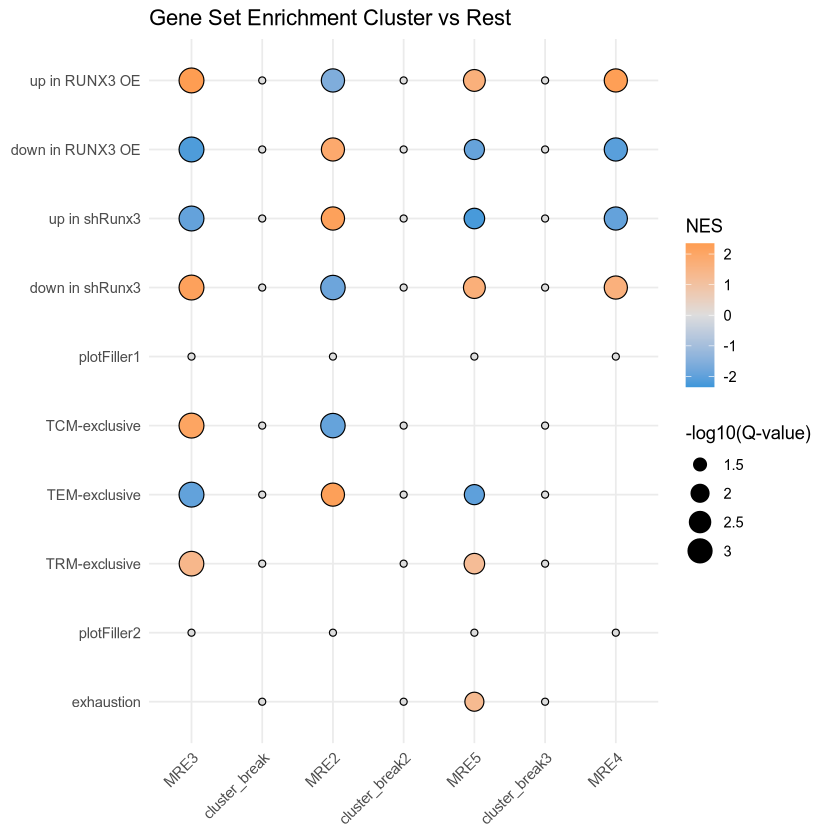

In [8]:
print(p)

In [9]:
pdf("figures/GSEA-Fig5D.pdf", height = 4.5, width = 4.8)
print(p)
dev.off()

pdf 
  2

## Cluster-Group Distributions

In [19]:
# Load obs dataframe
clusters <- read.csv("../../csv/03_25-12-08-02-28_obsDf_clustering_MRE.csv.gz")

# Limit to group and leiden_r1
clusters <- clusters[, c("group", "leiden_r1")]

# Recode group
clusters$group <- recode(clusters$group,
                            "Naive"         = "naive",
                            "d5"            = "day 5",
                            "d8"            = "day 8",
                            "Base"          = "mock",
                            "Null"          = "shRunx3",
                            "WT"            = "RUNX3 OE",
                            "dAD"           = "dAD",
                            "dID"           = "dID",
                            "dVWRPY"        = "dVWRPY"
)

clusters$group <- factor(clusters$group, levels = c("naive", "day 5", "day 8", "mock", "shRunx3", "RUNX3 OE", "dAD", "dID", "dVWRPY"))
clusters$leiden <- factor(as.character(clusters$leiden_r1), levels = as.character(c(0:15)))

`summarise()` has grouped output by 'leiden'. You can override using the
`.groups` argument.


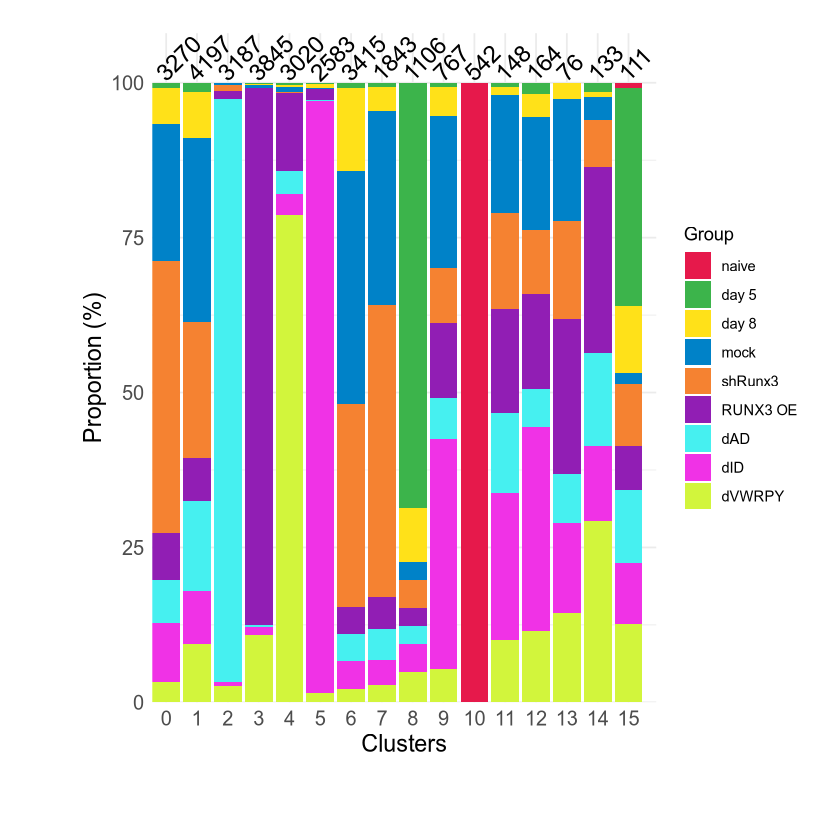

In [20]:
# Code by ChatGPT
cluster_proportions <- clusters %>%
  group_by(leiden, group) %>%
  summarise(count = n()) %>%
  group_by(leiden) %>%
  mutate(proportion = count / sum(count) * 100) %>%
  ungroup()

cluster_sums <- cluster_proportions %>%
  group_by(leiden) %>%
  summarise(total_count = sum(count), .groups = "keep")

# Create a separate vector with total counts for each cluster
total_counts <- cluster_sums$total_count

# Create a separate dataframe with leiden and total_count
label_data <- data.frame(leiden = unique(cluster_proportions$leiden), total_count = total_counts)

# Define a custom color palette with 14 different colors
custom_palette <- c("#E6194B", "#3CB44B", "#FFE119", "#0082C8", "#F58231", "#911EB4", "#46F0F0", "#F032E6", "#D2F53C", "#008080", "#000080", "#AA6E28", "#800000", "#808000")

ggplot() +
  geom_bar(data = cluster_proportions, aes(x = leiden, y = proportion, fill = group), stat = "identity") +
  geom_text(data = label_data, aes(x = leiden, y = 100, label = total_count), vjust = 0, hjust = 0, size = 5, angle = 45) +
  labs(x = "Clusters", y = "Proportion (%)") +
  scale_fill_manual(values = custom_palette, name = "Group") +
  theme_minimal() +
  theme(axis.text = element_text(size = 12),  # Adjust the size of the axis text
        axis.title = element_text(size = 14),  # Adjust the size of the axis labels
        plot.margin = margin(20, 20, 50, 50)) +  # Adjust the plot margins
  scale_y_continuous(expand = expansion(mult = c(0, 0.08))) +  # Adjust the y-axis expand
  scale_x_discrete(expand = expansion(mult = c(0, 0.06))) 


pdf 
  2

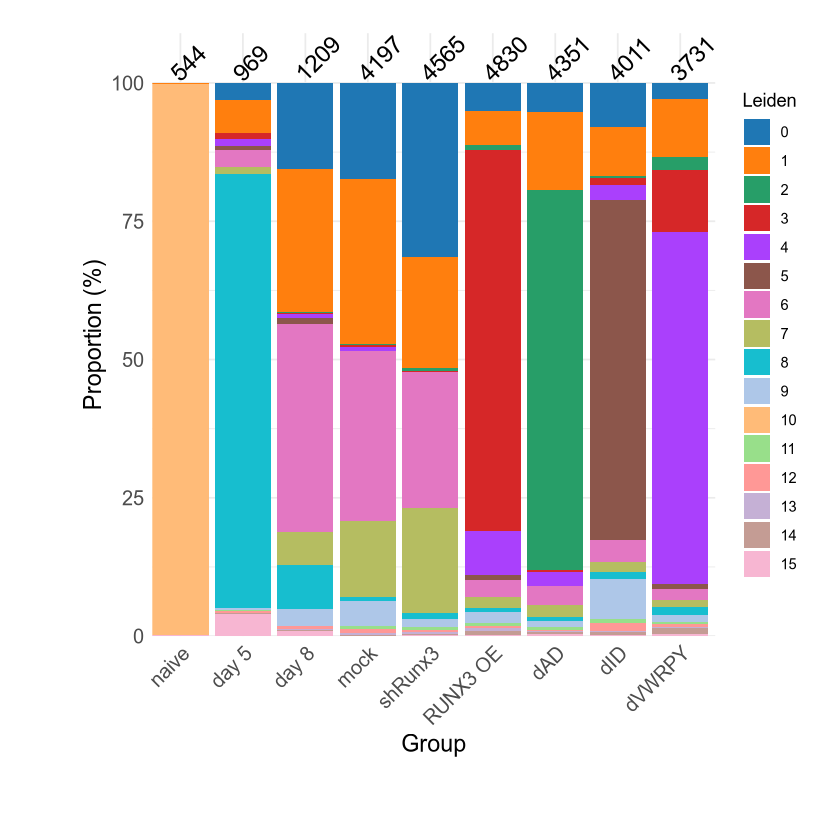

In [21]:
# Code by ChatGPT
cluster_proportions <- clusters %>%
  group_by(group, leiden) %>%
  summarise(count = n(), .groups = "keep") %>%
  group_by(group) %>%
  mutate(proportion = count / sum(count) * 100) %>%
  ungroup()

group_sums <- cluster_proportions %>%
  group_by(group) %>%
  summarise(total_count = sum(count), .groups = "keep")

# Create a separate vector with total counts for each group
total_counts <- group_sums$total_count

# Create a separate dataframe with group and total_count
label_data <- data.frame(group = unique(cluster_proportions$group), total_count = total_counts)

# Define a custom color palette with 14 different colors
# ['#1f77b4' '#ff7f0e' '#279e68' '#d62728' '#aa40fc' '#8c564b' '#e377c2'
#  '#b5bd61' '#17becf' '#aec7e8' '#ffbb78' '#98df8a' '#ff9896' '#c5b0d5']
custom_palette <- c(    '#1f77b4',
                        '#ff7f0e',
                        '#279e68',
                        '#d62728',
                        '#aa40fc',
                        '#8c564b',
                        '#e377c2',
                        '#b5bd61',
                        '#17becf',
                        '#aec7e8',
                        '#ffbb78',
                        '#98df8a',
                        '#ff9896',
                        '#c5b0d5',
                        '#c49c94',
                        '#f7b6d2')

p <- ggplot() +
    geom_bar(data = cluster_proportions, aes(x = group, y = proportion, fill = leiden), stat = "identity") +
    geom_text(data = label_data, aes(x = group, y = 100, label = total_count), vjust = 0, hjust = 0, size = 5, angle = 45) +
    labs(x = "Group", y = "Proportion (%)") +
    scale_fill_manual(values = custom_palette, name = "Leiden") +
    theme_minimal() +
    theme(axis.text = element_text(size = 12),  # Adjust the size of the axis text
            axis.title = element_text(size = 14),  # Adjust the size of the axis labels
            plot.margin = margin(20, 20, 50, 50),  # Adjust the plot margins
            axis.text.x = element_text(angle = 45, hjust = 1)) +  # Rotate X-axis labels by 45 degrees
    scale_y_continuous(expand = expansion(mult = c(0, 0.09))) +  # Adjust the y-axis expand
    scale_x_discrete(expand = expansion(mult = c(0, 0.07)))

print(p)

pdf("figures/barplot_Fig5B.pdf")
print(p)
dev.off()

## Alluvial Plots

In [27]:
obs_df <- clusters

# Add the prefix MRE to the leiden_r1 column
obs_df$leiden_r1 <- paste0("MRE", obs_df$leiden_r1)

# Make new column leiden
# This column should be equal to leiden_r1
# but if the value is not in (MRE0, MRE1, MRE2, MRE3, MRE4, MRE5, MRE6, MRE7, MRE10), change to "other"
# Then make it a factor with levels in order: MRE0, MRE1, MRE2, MRE3, MRE4, MRE5, MRE6, MRE7, MRE10, other
obs_df$leiden <- ifelse(obs_df$leiden_r1 %in% c("MRE0", "MRE1", "MRE2", "MRE3", "MRE4", "MRE5", "MRE6", "MRE7", "MRE10"),
                         obs_df$leiden_r1,
                         "other")
obs_df$leiden <- factor(obs_df$leiden, levels = c("MRE0", "MRE1", "MRE2", "MRE3", "MRE4", "MRE5", "MRE6", "MRE7", "MRE10", "other"))

In [30]:
## Load required packages ---------------------------------------------

# Grammar of graphics
library(ggplot2)

# For manipulating data frames
library(dplyr)

# For drawing alluvial (Sankey-like) plots with ggplot2
library(ggalluvial)


## 1. Make sure the relevant columns are factors ----------------------

obs_df <- obs_df %>%
  mutate(
    group  = factor(group),   # e.g. experimental group / sample / condition
    leiden = factor(leiden)   # cluster ID from Leiden clustering
  )


obs_df$leiden <- factor(obs_df$leiden, levels = c("MRE1", "MRE6", "MRE0", "MRE7", "MRE3", "MRE4", "MRE2", "MRE5", "other", "MRE10"))
obs_df$group <- factor(obs_df$group, levels = c("day 8", "mock","shRunx3", "RUNX3 OE", "dVWRPY", "dAD", "dID", "day 5", "naive"))

## 2. Collapse single cells into counts per (group, leiden) pair ------

flow_df <- obs_df %>%
  count(group, leiden, name = "n")  
  # 'n' is the number of cells in each combination of group and leiden


## 3. Basic alluvial plot: cells flowing from group -> leiden ---------
pdf("figures/alluvial_EFig5b.pdf")
ggplot(
  flow_df,
  aes(
    y     = n,        # height of each flow = number of cells
    axis1 = group,    # left-hand axis (source)
    axis2 = leiden    # right-hand axis (target)
  )
) +
  # The flows between axes (one polygon per group–leiden combination)
  geom_alluvium(
    aes(fill = group),  # color flows by group (you can change to 'leiden' if preferred)
    width = 0.2,        # thickness of the vertical axes
    alpha = 0.8         # slight transparency so overlapping flows are visible
  ) +
  
  # The vertical bars (strata) for each category on each axis
  geom_stratum(
    width = 0.2,        # matches width in geom_alluvium
    fill  = "grey80",   # base fill color for the bars
    color = "black"     # outline color for the bars
  ) +
  
  # Labels on top of each stratum (i.e., group and leiden labels)
  geom_text(
    stat = "stratum",
    aes(label = after_stat(stratum)),  # 'stratum' is computed by ggalluvial
    size = 3
  ) +
  
  # Define the x-axis with two "axes": group and leiden
  scale_x_discrete(
    limits = c("group", "leiden"),     # labels for the two axes
    expand = c(.1, .05)                # padding around plot
  ) +
  
  # Label axes and legend
  labs(
    x     = NULL,
    y     = "Number of cells",
    fill  = "Group",
    title = "Distribution of single-cell groups across Leiden clusters"
  ) +
  
  # Use a clean theme
  theme_minimal() +
  theme(
    axis.text.y  = element_text(size = 10),
    axis.text.x  = element_text(size = 10),
    plot.title   = element_text(hjust = 0.5, face = "bold"),
    legend.position = "right"
  )
dev.off()


pdf 
  2

## Mean Normalized Expression 

In [41]:
ave_exp <- read.csv("../../csv/figure05_MRE_tanhExp.csv.gz", row.names = 1)

# Row-wise Z-score normalization of ave_exp
ave_exp_norm <- t(apply(ave_exp, 1, function(x) {
  # For each row (gene), subtract mean and divide by standard deviation
  (x - mean(x)) / sd(x)
}))

# Convert the result back to a dataframe and keep original row names
ave_exp_norm <- as.data.frame(ave_exp_norm)
rownames(ave_exp_norm) <- rownames(ave_exp)

ave_exp_norm <- ave_exp_norm[ ]

# View the normalized dataframe
print(ave_exp_norm)

max <- max(abs(ave_exp_norm))
breaks <- seq(-max, max, length.out = 101)
# Use the inferno color palette
colors <- inferno(100)

                        MRE0          MRE1          MRE2         MRE3
Rb1cc1          0.3571139881 -1.424820e+00  7.505474e-02 -0.713709913
St18            0.0375402305 -7.608901e-01 -3.606118e-01 -1.090874337
1700034P13Rik  -0.0930060974 -7.667297e-01  6.650643e-01 -0.459431152
Sgk3           -0.9025086724 -4.341719e-01 -7.481675e-01  2.064387058
Cspp1          -0.2177536022 -1.711168e+00  1.883770e-01 -0.651240179
Ncoa2           0.1770844652 -1.498688e+00  6.381806e-01 -0.769663033
Stau2          -0.2883159555 -1.531224e-01  2.198308e+00 -1.175394274
Mcm3           -0.0721786096  7.425754e-01 -3.409334e-01 -0.727158539
Khdc1a         -0.6799643039 -4.403934e-01  3.499751e-01  0.722009302
Kcnq5          -0.8509452930 -8.511568e-01  1.218649e+00  0.762059769
Prim2          -0.5710987991 -1.450686e+00  8.691264e-01  0.073836229
4930568A12Rik   0.9553062344  1.467176e+00  2.281893e-02 -1.261244428
Neurl3         -0.8769251659 -4.420960e-01 -7.093330e-01  2.134514580
Inpp4a          0.21

In [42]:
# From ave_exp_norm, remove the row Tox
# and the column "MRE5"
geneset = c(
    'Prdm1',
    'Tbx21',
    'Prf1',
    'Klrg1',
    'Cx3cr1',
    'Zeb2',
    'Foxo1',
    'Zeb1',
    'Id3',
    'Bach2',
    'Tcf7',
    'Id2',
    'Il7r',
    'Gzmb',
    'Ifng',
    'Eomes',
    'Cd27',
    'Tox'
)

ave_exp_norm <- ave_exp_norm[rownames(ave_exp_norm) %in% geneset, ]
# Ensure row names are explicitly set
gene_labels <- rownames(ave_exp_norm)


In [44]:
library(pheatmap)
library(RColorBrewer)
# Ensure row names are explicitly set
gene_labels <- rownames(ave_exp_norm)

# Make colors RdBu from RColorBrewer
colors <- colorRampPalette(brewer.pal(11, "RdYlBu"))(100)
# Reverse the colors
colors <- rev(colors)

max <- max(abs(ave_exp_norm))

# Define breaks to center color at 0 and specify limits
breaks <- seq(-max, max, length.out = 101)  # Adjust limits (-3, 3) as needed

# Generate heatmap
pheatmap(   ave_exp_norm,
            color = colors,
            breaks = breaks,
            cutree_cols = 5,

            # labels_row = custom_labels,
            # labels_col = c("mock", "Runx3-WT", "Runx3-dID", "naive"),
            border_color = "black",
            fontsize = 12,
            angle_col = 45,
            width = 3.2,
            height = 3.2,
            treeheight_row = 10,
            treeheight_col = 10,
            filename = "figures/heatmapTanhExp_Fig1E.pdf")


## Log2FC Scatter Plots

In [52]:
library(tibble)

sigs <- read.csv("../../signatures/genesets_v11_Ensembl98.csv")
head(sigs)

# Keep only gs_name and gene_symbol in sigs
# Then convert sigs into a list of character vectors
# in which each element is a gene set defined by gs_name
sigs_list <- sigs %>%
    select(gs_name, gene_symbol) %>%
    group_by(gs_name) %>%
    summarise(genes = list(unique(gene_symbol))) %>%
    deframe()

names(sigs_list)

,gs_name,gene_symbol
,<chr>,<chr>
1,TXM_lib-8C,Abi2
2,TXM_lib-8C,Acsf3
3,TXM_lib-8C,Adam8
4,TXM_lib-8C,Ano10
5,TXM_lib-8C,Cables1
6,TXM_lib-8C,Cd9


[1] "2016_SCIENCE_Mackay---TCM_vs_TEM-TRM"                
  [2] "2016_SCIENCE_Mackay---TEM_vs_TCM-TRM"                
  [3] "2016_SCIENCE_Mackay---TRM_vs_TCM-TEM"                
  [4] "Albao_Runx3KD"                                       
  [5] "Albao_Runx3KD_Down"                                  
  [6] "Albao_Runx3OE"                                       
  [7] "Albao_Runx3OE_Down"                                  
  [8] "BYSTRYKH_HEMATOPOIESIS_STEM_CELL_RUNX1"              
  [9] "Bengsch_Exh_Down"                                    
 [10] "Bengsch_Exh_Down_Epi"                                
 [11] "Bengsch_Exh_Up"                                      
 [12] "Bengsch_Exh_Up_Epi"                                  
 [13] "Bresser_hdTcm"                                       
 [14] "Bresser_ldTcm"                                       
 [15] "CA-RIT-NFAT1_CD8_promoted"                           
 [16] "CA-RIT-NFAT1_CD8_repressed"                          
 [17] "CA-RIT-NFAT1_allTcell_promoted"                      
 [18] "CA-RIT-NFAT1_allTcell_repressed"                     
 [19] "D8_EEC-Runx3_promoted"                               
 [20] "D8_EEC-Runx3_repressed"                              
 [21] "D8_MPEC-Runx3_promoted"                              
 [22] "D8_MPEC-Runx3_repressed"                             
 [23] "D8_SLEC-Runx3_promoted"                              
 [24] "D8_SLEC-Runx3_repressed"                             
 [25] "Diao_IL2_promoted"                                   
 [26] "Diao_IL2_repressed"                                  
 [27] "Diao_P0"                                             
 [28] "Diao_P1"                                             
 [29] "Diao_P10"                                            
 [30] "Diao_P2"                                             
 [31] "Diao_P3"                                             
 [32] "Diao_P4"                                             
 [33] "Diao_P5"                                             
 [34] "Diao_P6"                                             
 [35] "Diao_P7"                                             
 [36] "Diao_P8"                                             
 [37] "Diao_P9"                                             
 [38] "Ets1_downregulated"                                  
 [39] "Ets1_upregulated"                                    
 [40] "Exp391_CD8---Act48h_dn"                              
 [41] "Exp391_CD8---Act48h_up"                              
 [42] "Exp391_CD8---DP_dn"                                  
 [43] "Exp391_CD8---DP_up"                                  
 [44] "Exp391_CD8---EE_dn"                                  
 [45] "Exp391_CD8---EE_up"                                  
 [46] "Exp391_CD8---EXH_dn"                                 
 [47] "Exp391_CD8---EXH_up"                                 
 [48] "Exp391_CD8---GSE132110_Tim3pos_vs_Tim3neg---Tim3neg" 
 [49] "Exp391_CD8---GSE132110_Tim3pos_vs_Tim3neg---Tim3pos" 
 [50] "Exp391_CD8---GSE68056_WT_vs_Blimp1KO---Blimp1KO"     
 [51] "Exp391_CD8---GSE68056_WT_vs_Blimp1KO---WT"           
 [52] "Exp391_CD8---GSE68056_WT_vs_Il2raKO---Il2raKO"       
 [53] "Exp391_CD8---GSE68056_WT_vs_Il2raKO---WT"            
 [54] "Exp391_CD8---GSE68056_WT_vs_Tbx21KO---Tbx21KO"       
 [55] "Exp391_CD8---GSE68056_WT_vs_Tbx21KO---WT"            
 [56] "Exp391_CD8---GSE72408_WT_vs_Tbx21KO---Tbx21KO"       
 [57] "Exp391_CD8---GSE72408_WT_vs_Tbx21KO---WT"            
 [58] "Exp391_CD8---JJM_CirculatingSignature"               
 [59] "Exp391_CD8---JJM_TrmSignature"                       
 [60] "Exp391_CD8---MEM_dn"                                 
 [61] "Exp391_CD8---MEM_up"                                 
 [62] "Exp391_CD8---MP_dn"                                  
 [63] "Exp391_CD8---MP_up"                                  
 [64] "Exp391_CD8---NAV_dn"                                 
 [65] "Exp391_CD8---NAV_up"                                 
 [66] "Exp391_CD8---TE_biased"       

In [53]:
# Use ggprism, base 12, not bold, and remove legend
theme <- theme_bw(      base_size = 14,
                        base_family = "sans"
                        ) +
    theme(  axis.text = element_text(size = 10, color = "black"),
            axis.title = element_text(size = 12, color = "black"),
            axis.text.x = element_text(size = 10, color = "black"),
            axis.text.y = element_text(size = 10, color = "black"),
            # axis.title.x = element_blank(),
            strip.text = element_text(size = 12),
            legend.position = "none",
            plot.title = element_text(size = 12),  # Set main title size
            panel.grid = element_blank())  # Remove gridlines

# Plot dAD vs WT
# Highlight genes in sigs_list[["Bengsch_Exh_Up"]] and sigs_list[["Albao_Runx3OE"]]
# With different colors PER LIST

plot_gene_density <- function(  df, x, y, gene_lists, colors = NULL,
                                xlim = c(-5, 5), ylim = c(-5, 5), title = NULL,
                                highlight_genes = NULL, seed = 42,
                                bg_radius_quantile = 0.95,         # quantile for radius
                                bg_underplot_drop_prop = 0.95) {   # fraction to DROP inside radius

    # ---------------------------
    # safety checks / parameters
    # ---------------------------
    # clamp props into [0,1]
    bg_radius_quantile <- max(0, min(1, bg_radius_quantile))
    bg_underplot_drop_prop <- max(0, min(1, bg_underplot_drop_prop))
    # convert "drop" proportion to "keep" proportion for sampling
    bg_keep_prop_inside <- 1 - bg_underplot_drop_prop

    # ---------------------------
    # color handling (unchanged)
    # ---------------------------
    if (is.null(colors)) {
        colors <- setNames(grDevices::rainbow(length(gene_lists)), names(gene_lists))
    } else {
        if (is.null(names(colors)) || any(names(colors) == "")) {
            names(colors) <- names(gene_lists)[seq_along(colors)]
        }
        missing_sets <- setdiff(names(gene_lists), names(colors))
        if (length(missing_sets) > 0) {
            colors[missing_sets] <- grDevices::rainbow(length(missing_sets))
        }
        colors <- colors[names(gene_lists)]
    }

    # -------------------------------------------------------
    # compute thinning radius by quantile of distance to (0,0)
    # and randomly keep only a subset INSIDE that radius
    # -------------------------------------------------------
    df_with_dist <- df %>%
        dplyr::mutate(
            .x = .data[[x]],
            .y = .data[[y]],
            .dist0 = sqrt(.x^2 + .y^2)
        )

    # radius at requested quantile (NA-safe)
    r_q <- as.numeric(stats::quantile(  df_with_dist$.dist0,
                                        probs = bg_radius_quantile, na.rm = TRUE))

    # logical split
    inside_circle  <- df_with_dist %>% dplyr::filter(.dist0 <= r_q)
    outside_circle <- df_with_dist %>% dplyr::filter(.dist0 >  r_q)

    # reproducible sampling INSIDE the radius:
    # keep proportion = (1 - drop_prop). If keep = 0, result is empty.
    if (!is.null(seed)) set.seed(seed)
    inside_kept <- if (nrow(inside_circle) > 0 && bg_keep_prop_inside > 0) {
        dplyr::slice_sample(inside_circle, prop = bg_keep_prop_inside)
    } else {
        inside_circle[0, ]
    }

    # background points to plot = all outside + sampled inside
    bg_df <- dplyr::bind_rows(inside_kept, outside_circle)

    # --------------------------------------
    # base plot: thinned grey background
    # --------------------------------------
    p <- ggplot() +
        geom_point(
            data = bg_df,
            mapping = aes(x = .x, y = .y),
            color = "grey80",
            size = 0.6
        )

    # -------------------------------------------------
    # gene set overlays: density or points (as before)
    # -------------------------------------------------
    for (nm in names(gene_lists)) {
        gset <- gene_lists[[nm]]
        layer_data <- df %>% dplyr::filter(names %in% gset) %>% dplyr::mutate(.set = nm)

        if (nrow(layer_data) >= 3) {
            p <- p + stat_density_2d(
                data = layer_data,
                aes_string(x = x, y = y, color = ".set"),
                geom = "density_2d",
                contour = TRUE,
                size = 0.5,
                alpha = 0.8
            )
        } else if (nrow(layer_data) > 0) {
            p <- p + geom_point(
                data = layer_data,
                mapping = aes_string(x = x, y = y, color = ".set"),
                size = 2
            )
        }
    }

    # ---------------------------------------
    # quadrant counts and label placement
    # ---------------------------------------
    n_sets <- length(gene_lists)
    set_names <- names(gene_lists)
    range_x <- diff(xlim)
    range_y <- diff(ylim)
    anchors <- list(
        Q1 = c(x = xlim[2] * 0.8, y = ylim[2] * 0.8), # x>0,y>0
        Q2 = c(x = xlim[1] * 0.8, y = ylim[2] * 0.8), # x<0,y>0
        Q3 = c(x = xlim[1] * 0.8, y = ylim[1] * 0.8), # x<0,y<0
        Q4 = c(x = xlim[2] * 0.8, y = ylim[1] * 0.8)  # x>0,y<0
    )
    offset_step_x <- range_x * 0.05
    offset_step_y <- range_y * 0.05

    counts_list <- list()
    for (i in seq_along(set_names)) {
        nm <- set_names[i]
        gset <- gene_lists[[nm]]
        sub <- df %>% dplyr::filter(names %in% gset)

        q1 <- nrow(sub %>% dplyr::filter(.data[[x]] > 0 & .data[[y]] > 0))
        q2 <- nrow(sub %>% dplyr::filter(.data[[x]] < 0 & .data[[y]] > 0))
        q3 <- nrow(sub %>% dplyr::filter(.data[[x]] < 0 & .data[[y]] < 0))
        q4 <- nrow(sub %>% dplyr::filter(.data[[x]] > 0 & .data[[y]] < 0))

        idx_centered <- i - (n_sets + 1) / 2
        off_x <- idx_centered * offset_step_x
        off_y <- idx_centered * offset_step_y

        df_counts <- tibble::tibble(
            .set = nm,
            quad = c("Q1", "Q2", "Q3", "Q4"),
            count = c(q1, q2, q3, q4),
            xpos = c(anchors$Q1["x"], anchors$Q2["x"], anchors$Q3["x"], anchors$Q4["x"]) + off_x,
            ypos = c(anchors$Q1["y"], anchors$Q2["y"], anchors$Q3["y"], anchors$Q4["y"]) + off_y
        )

        counts_list[[nm]] <- df_counts
    }

    counts_df <- dplyr::bind_rows(counts_list) %>%
        dplyr::filter(count > 0) %>%
        dplyr::mutate(.set = factor(.set, levels = set_names))

    if (nrow(counts_df) > 0) {
        p <- p + geom_text(
            data = counts_df,
            aes(x = xpos, y = ypos, label = count, color = .set),
            size = 12/.pt,
            show.legend = FALSE
        )
    }

    # --------------------
    # highlight genes
    # --------------------
    if (!is.null(highlight_genes) && length(highlight_genes) > 0) {
        highlight_df <- df %>% dplyr::filter(names %in% highlight_genes)
        if (nrow(highlight_df) > 0) {
            p <- p + geom_point(
                data = highlight_df,
                mapping = aes_string(x = x, y = y),
                color = "black",
                size = 2.2
            ) +
                ggrepel::geom_text_repel(
                    data = highlight_df,
                    aes_string(x = x, y = y, label = "names"),
                    color = "black",
                    size = 12/.pt,
                    fontface = "italic",
                    box.padding = 0.3,
                    point.padding = 0.2,
                    segment.size = 0.4,
                    max.overlaps = Inf,
                    show.legend = FALSE
                )
        }
    }

    # --------------------
    # styling
    # --------------------
    p <- p +
        scale_color_manual(name = "Gene set", values = colors) +
        theme_classic() +
        xlab(paste0("log2FC ", x)) +
        ylab(paste0("log2FC ", y)) +
        xlim(xlim) +
        ylim(ylim) +
        ggtitle(ifelse(is.null(title), paste0(y, " vs ", x), title)) +
        theme(plot.title = element_text(hjust = 0.5)) +
        geom_hline(yintercept = 0, linetype = "dashed", color = "blue") +
        geom_vline(xintercept = 0, linetype = "dashed", color = "blue") +
        theme(aspect.ratio = 1) +
        theme

    return(p)
}


In [54]:
# Load
mre     <- read.csv("../../csv/04_25-12-08-02-46_MRE_cVr-diffExp.csv.gz")
mre_cVc <- read.csv("../../csv/04_25-12-10-23-27_MRE_cVc-diffExp.csv.gz")

head(mre)
head(mre_cVc)

,group,names,scores,logfoldchanges,pvals,pvals_adj
,<int>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>
1,0,Zeb2,53.05967,2.6161666,0,0
2,0,Gzma,45.36801,2.8395426,0,0
3,0,Cx3cr1,45.00136,1.8018973,0,0
4,0,Il18rap,43.20697,1.5030870,0,0
5,0,Rap1b,42.07179,0.8865863,0,0
6,0,Klrg1,38.62137,1.5004872,0,0


,reference,group,names,scores,logfoldchanges,pvals,pvals_adj
,<int>,<int>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>
1,3,0,Zeb2,70.19361,6.447367,0,0
2,3,0,Rap1b,60.31097,1.993224,0,0
3,3,0,Cx3cr1,59.49027,3.526240,0,0
4,3,0,Il18rap,59.22067,3.231799,0,0
5,3,0,Gzma,55.31300,5.352471,0,0
6,3,0,Runx1,52.47940,2.818782,0,0


In [55]:
# Keep names in all group which have a pvals_adj < 0.05 at least once 
significant_names <- mre %>%
    filter(pvals_adj < 0.05) %>%
    select(names) %>%
    unlist() %>%
    unique()

length(significant_names)

[1] 8223

In [56]:
# Append MRE prefix to group
mre <- mre %>%
    mutate(group = paste0("MRE", group)) %>%
    # Keep only group, names and logfoldchanges
    select(group, names, logfoldchanges) %>%
    # Keep only MRE0, 1, 2, 3, 4, 5, 6 and 7
    filter(group %in% paste0("MRE", 0:7), names %in% significant_names) %>%
    spread(key = group, value = logfoldchanges)

mre_cVc <- mre_cVc %>%
    mutate(group = paste0("MRE", group)) %>%
    mutate(reference = paste0("MRE", reference)) %>%
    # Keep only MRE0, 1, 2, 3, 4, 5, 6 and 7
    filter(group %in% paste0("MRE", 0:7), reference %in% paste0("MRE", 0:7), names %in% significant_names) %>%
    # Combine group and reference into group
    mutate(group = paste0(group, "v", reference)) %>%
    # Keep only group, names and logfoldchanges
    select(group, names, logfoldchanges) %>%
    spread(key = group, value = logfoldchanges)

head(mre)
head(mre_cVc)

,names,MRE0,MRE1,MRE2,MRE3,MRE4,MRE5,MRE6,MRE7
,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,0610009B22Rik,0.000659672,0.11547466,-0.3046686,-0.3311543,-0.20087104,0.28353354,-0.01963523,-0.2958093
2,0610010F05Rik,-0.319686100,-1.02267290,-0.6974412,0.7744352,0.24642834,0.31279540,-0.07221633,0.1006040
3,0610010K14Rik,0.181583540,0.23438840,-0.1280481,-0.2604363,-0.23165779,0.03641998,-0.05348782,-0.1904422
4,0610012G03Rik,0.097423814,0.15163626,-0.2030379,0.1709893,-0.08200151,0.15713999,-0.17639300,-0.2242448
5,0610030E20Rik,0.292866300,0.09657314,0.1463955,-0.7707888,-0.11226247,-0.20653242,0.16642836,0.1914184
6,0610043K17Rik,-1.363200300,-1.54438050,-0.5852063,0.4711057,-0.17080377,-0.54497814,0.37657785,-1.0254554


,names,MRE0vMRE2,MRE0vMRE3,MRE0vMRE4,MRE0vMRE5,MRE1vMRE2,MRE1vMRE3,MRE1vMRE4,MRE1vMRE5,MRE2vMRE3,⋯,MRE5vMRE2,MRE5vMRE3,MRE6vMRE2,MRE6vMRE3,MRE6vMRE4,MRE6vMRE5,MRE7vMRE2,MRE7vMRE3,MRE7vMRE4,MRE7vMRE5
,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,0610009B22Rik,0.2739220,0.29086724,0.1813006,-0.25491830,0.3712004,0.38814557,0.2785789,-0.15763997,0.01694522,⋯,0.52884030,0.545785550,0.25605038,0.27299562,0.1634290,-0.2727899,-0.004909831,0.01203539,-0.09753123,-0.5337501
2,0610010F05Rik,0.3471536,-0.93036604,-0.5043812,-0.56769115,-0.2750613,-1.55258080,-1.1265960,-1.18990600,-1.27751960,⋯,0.91484470,-0.362674920,0.56953377,-0.70798580,-0.2820009,-0.3453109,0.727119800,-0.55039984,-0.12441494,-0.1877249
3,0610010K14Rik,0.2740081,0.38677920,0.3680524,0.12690948,0.3123582,0.42512926,0.4064025,0.16525955,0.11277109,⋯,0.14709863,0.259869720,0.06689352,0.17966461,0.1609379,-0.0802051,-0.064517654,0.04825344,0.02952671,-0.2116163
4,0610012G03Rik,0.2670416,-0.06118524,0.1594325,-0.05644503,0.3097110,-0.01851575,0.2021020,-0.01377554,-0.32822680,⋯,0.32348660,-0.004740208,0.02522016,-0.30300665,-0.0823889,-0.2982664,-0.029243778,-0.35747057,-0.13685283,-0.3527304
5,0610030E20Rik,0.1272338,0.94115365,0.3572517,0.44531804,-0.0473866,0.76653326,0.1826313,0.27069765,0.81391984,⋯,-0.31808427,0.495835600,0.01621832,0.83013820,0.2462362,0.3343026,0.048997700,0.86291754,0.27901560,0.3670820
6,0610043K17Rik,-0.7273748,-1.65521760,-1.1038786,-0.75443166,-0.8662175,-1.79406030,-1.2427212,-0.89327437,-0.92784290,⋯,0.02705688,-0.900786040,0.85591906,-0.07192382,0.4794153,0.8288622,-0.446778570,-1.37462150,-0.82328236,-0.4738354


In [57]:
# Left join mre and mre_cVc by names
mre <- left_join(mre, mre_cVc, by = "names")

head(mre)

,names,MRE0,MRE1,MRE2,MRE3,MRE4,MRE5,MRE6,MRE7,MRE0vMRE2,⋯,MRE5vMRE2,MRE5vMRE3,MRE6vMRE2,MRE6vMRE3,MRE6vMRE4,MRE6vMRE5,MRE7vMRE2,MRE7vMRE3,MRE7vMRE4,MRE7vMRE5
,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,0610009B22Rik,0.000659672,0.11547466,-0.3046686,-0.3311543,-0.20087104,0.28353354,-0.01963523,-0.2958093,0.2739220,⋯,0.52884030,0.545785550,0.25605038,0.27299562,0.1634290,-0.2727899,-0.004909831,0.01203539,-0.09753123,-0.5337501
2,0610010F05Rik,-0.319686100,-1.02267290,-0.6974412,0.7744352,0.24642834,0.31279540,-0.07221633,0.1006040,0.3471536,⋯,0.91484470,-0.362674920,0.56953377,-0.70798580,-0.2820009,-0.3453109,0.727119800,-0.55039984,-0.12441494,-0.1877249
3,0610010K14Rik,0.181583540,0.23438840,-0.1280481,-0.2604363,-0.23165779,0.03641998,-0.05348782,-0.1904422,0.2740081,⋯,0.14709863,0.259869720,0.06689352,0.17966461,0.1609379,-0.0802051,-0.064517654,0.04825344,0.02952671,-0.2116163
4,0610012G03Rik,0.097423814,0.15163626,-0.2030379,0.1709893,-0.08200151,0.15713999,-0.17639300,-0.2242448,0.2670416,⋯,0.32348660,-0.004740208,0.02522016,-0.30300665,-0.0823889,-0.2982664,-0.029243778,-0.35747057,-0.13685283,-0.3527304
5,0610030E20Rik,0.292866300,0.09657314,0.1463955,-0.7707888,-0.11226247,-0.20653242,0.16642836,0.1914184,0.1272338,⋯,-0.31808427,0.495835600,0.01621832,0.83013820,0.2462362,0.3343026,0.048997700,0.86291754,0.27901560,0.3670820
6,0610043K17Rik,-1.363200300,-1.54438050,-0.5852063,0.4711057,-0.17080377,-0.54497814,0.37657785,-1.0254554,-0.7273748,⋯,0.02705688,-0.900786040,0.85591906,-0.07192382,0.4794153,0.8288622,-0.446778570,-1.37462150,-0.82328236,-0.4738354


In [58]:
# Example call for dAD vs WT using the two gene sets already in sigs_list
x = "MRE4vMRE3"
y = "MRE4"


ht_genes <- c("Zeb2", "Zeb1", "Tbx21", "Runx1", "Prdm1", "Foxo1", "Tcf7", "Il7r", "Klrg1", "Cx3cr1", "Cd27")

p   <-  plot_gene_density(  mre, x, y,
                            gene_lists = list(  Runx3OE = sigs_list[["Albao_Runx3OE"]],
                                                TEM     = sigs_list[["2016_SCIENCE_Mackay---TEM_vs_TCM-TRM"]],
                                                TCM     = sigs_list[["2016_SCIENCE_Mackay---TCM_vs_TEM-TRM"]]),
                            xlim = c(-7, 7), ylim = c(-7, 7),
                            colors = c(Runx3OE = "#00A087", TCM = "#1D2B53", TEM = "#FF004D"),
                            title = paste0(y, " vs ", x),
                            highlight_genes = ht_genes,
                            bg_radius_quantile = 0.75,
                            bg_underplot_drop_prop = 0.6)

pdf(paste0("figures/", x, "_vs_", y, ".pdf"), width = 4, height = 4)
print(p)
dev.off()

Warning message:
“`aes_string()` was deprecated in ggplot2 3.0.0.
ℹ Please use tidy evaluation idioms with `aes()`.
ℹ See also `vignette("ggplot2-in-packages")` for more information.”
Warning message:
“Using `size` aesthetic for lines was deprecated in ggplot2 3.4.0.
ℹ Please use `linewidth` instead.”
Warning message:
“Removed 2 rows containing non-finite outside the scale range
(`stat_density2d()`).”
Warning message:
“Removed 19 rows containing missing values or values outside the scale range
(`geom_point()`).”


pdf 
  2

In [59]:
# Example call for dAD vs WT using the two gene sets already in sigs_list
x = "MRE2vMRE3"
y = "MRE2"


ht_genes <- c("Zeb2", "Zeb1", "Tbx21", "Runx1", "Prdm1", "Foxo1", "Tcf7", "Il7r", "Klrg1", "Cx3cr1", "Cd27")

p   <-  plot_gene_density(  mre, x, y,
                            gene_lists = list(  Runx3OE = sigs_list[["Albao_Runx3OE"]],
                                                TEM     = sigs_list[["2016_SCIENCE_Mackay---TEM_vs_TCM-TRM"]],
                                                TCM     = sigs_list[["2016_SCIENCE_Mackay---TCM_vs_TEM-TRM"]]),
                            xlim = c(-7, 7), ylim = c(-7, 7),
                            colors = c(Runx3OE = "#00A087", TCM = "#1D2B53", TEM = "#FF004D"),
                            title = paste0(y, " vs ", x),
                            highlight_genes = ht_genes,
                            bg_radius_quantile = 0.75,
                            bg_underplot_drop_prop = 0.6)

pdf(paste0("figures/", x, "_vs_", y, ".pdf"), width = 4, height = 4)
print(p)
dev.off()

Warning message:
“Removed 3 rows containing non-finite outside the scale range
(`stat_density2d()`).”
Warning message:
“Removed 4 rows containing non-finite outside the scale range
(`stat_density2d()`).”
Warning message:
“Removed 29 rows containing missing values or values outside the scale range
(`geom_point()`).”


pdf 
  2

In [60]:
# Example call for dAD vs WT using the two gene sets already in sigs_list
x = "MRE5vMRE3"
y = "MRE5"

ht_genes <- c(  "Tox",
                "Runx2",
                "Pdcd1",
                "Ctla4",
                "Lag3",
                "Havcr2",
                "Nr4a1",
                "Nr4a2")

p   <-  plot_gene_density(  mre, x, y,
                            gene_lists = list(  
                                                ExhUp  = sigs_list[["Bengsch_Exh_Up"]]),
                            xlim = c(-5, 5), ylim = c(-5, 5),
                            title = paste0(y, " vs ", x),
                            colors = c(ExhUp = "#F95335"),
                            highlight_genes = ht_genes)

pdf(paste0("figures/", x, "_vs_", y, ".pdf"), width = 4, height = 4)
print(p)
dev.off()

Warning message:
“Removed 2 rows containing non-finite outside the scale range
(`stat_density2d()`).”
Warning message:
“Removed 38 rows containing missing values or values outside the scale range
(`geom_point()`).”


pdf 
  2

## Velocity Heatmap

In [61]:
ave_vel <- read.csv("../../csv/figure05_MRE_tanhVelocity.csv.gz", row.names = 1)

ave_vel <- ave_vel[, c("MRE0","MRE1","MRE2","MRE3","MRE4","MRE5","MRE6","MRE7")]
ave_vel <- ave_vel[rownames(ave_vel) %in% geneset, ]

In [64]:
library(RColorBrewer)

# Make colors RdBu from RColorBrewer
colors <- colorRampPalette(brewer.pal(11, "Spectral"))(100)
# Reverse the colors
colors <- rev(colors)

max <- 0.3

# Define breaks to center color at 0 and specify limits
breaks <- seq(-max, max, length.out = 101)  # Adjust limits (-3, 3) as needed


# Generate heatmap
pheatmap(   ave_vel,
            color = colors,
            breaks = breaks,
            cutree_cols = 5,

            # labels_row = custom_labels,
            # labels_col = c("mock", "Runx3-WT", "Runx3-dID", "naive"),
            border_color = "black",
            fontsize = 12,
            angle_col = 45,
            width = 3.2,
            height = 3.2,
            treeheight_row = 10,
            treeheight_col = 10,
            filename = "figures/heatmapTanhVel_Fig1E.pdf")